In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster._dbscan_inner import dbscan_inner
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
import folium
from sklearn.metrics import silhouette_score


missing_females = pd.read_csv("Missing_female_cleaned.csv")

In [2]:
missing_mod=missing_females.drop("Unnamed: 0", axis=1)

In [3]:
missing_mod

name        Date                 Location   Age  \
0      Lisa Karen Addington  1984-05-16          Tulsa, Oklahoma  22.0   
1        Gail Evon Anderson  2004-10-23         Duncan, Oklahoma  29.0   
2             Ina M. Arnall  1981-05-28         Poteau, Oklahoma  46.0   
3     Shirley Joann Banning  1975-05-23     Broken Bow, Oklahoma  36.0   
4        Amber Renee Barker  1997-12-08  Oklahoma City, Oklahoma  10.0   
...                     ...         ...                      ...   ...   
6900          Mawahib Ahmed  2019-04-17              Toronto, ON   5.0   
6901   Liyana Mohamed Abdow  2019-04-14              Toronto, ON  31.0   
6902            Esther Adam  1996-05-15              Toronto, ON  28.0   
6903          Bonny Ainslie  1978-06-23              Toronto, ON  26.0   
6904       Cynderella Allen  2017-08-24              Toronto, ON  76.0   

                   Race  Height     Weight  \
0     Caucasian / White   173.0    125 lbs   
1     Caucasian / White   150.0    120 lbs   
2     Caucasian / White   150.0  100.0 lbs   
3     Caucasian / White   175.0    160 lbs   
4     Caucasian / White   150.0   75.0 lbs   
...                 ...     ...        ...   
6900                NaN     NaN        NaN   
6901              Black   168.0        NaN   
6902              White   170.0    130 lbs   
6903              White   155.0    141 lbs   
6904              Black   152.0        NaN   

                                            Description  longitude   latitude  \
0     Addington was in Tulsa, Oklahoma in May 1984 t... -95.850906  36.133716   
1     Anderson was last seen in the evening hours of... -97.940948  34.501888   
2     Arnall was last seen in Poteau, Oklahoma on Ma... -95.893478  36.187628   
3     Shirley was last seen in Broken Bow, Oklahoma ... -94.738970  34.028478   
4     Amber was last seen at approximately 6:00 p.m.... -97.566630  35.517138   
...                                                 ...        ...        ...   
6900  On April 14, 2019, at approximately 4:00 p.m.,... -79.366537  43.654528   
6901  On April 14, 2019, at approximately 4:00 p.m.,... -79.366601  43.654559   
6902  On May 15, 1996, at approximately 1:30 p.m., E... -79.383031  43.654104   
6903  On the evening of June 23, 1978, Bonny Ainslie... -79.384077  43.653234   
6904  On August 24, 2017, at approximately 3:10pm, C... -79.418468  43.642781   

      Numeric_Height_cm  Numeric_Weight_lbs           Standarized_Race  \
0                 173.0               125.0                      White   
1                 150.0               120.0                      White   
2                 150.0               100.0                      White   
3                 175.0               160.0                      White   
4                 150.0                75.0                      White   
...                 ...                 ...                        ...   
6900                NaN                 NaN                      Other   
6901              168.0                 NaN  Black or African American   
6902              170.0               130.0                      White   
6903              155.0               141.0                      White   
6904              152.0                 NaN  Black or African American   

     Standarized_Ethnicity  
0      Non-Hispanic/Latino  
1      Non-Hispanic/Latino  
2      Non-Hispanic/Latino  
3      Non-Hispanic/Latino  
4      Non-Hispanic/Latino  
...                    ...  
6900   Non-Hispanic/Latino  
6901   Non-Hispanic/Latino  
6902   Non-Hispanic/Latino  
6903   Non-Hispanic/Latino  
6904   Non-Hispanic/Latino  

[6905 rows x 14 columns]

In [4]:
X = missing_mod[["latitude", "longitude"]]
X

latitude  longitude
0     36.133716 -95.850906
1     34.501888 -97.940948
2     36.187628 -95.893478
3     34.028478 -94.738970
4     35.517138 -97.566630
...         ...        ...
6900  43.654528 -79.366537
6901  43.654559 -79.366601
6902  43.654104 -79.383031
6903  43.653234 -79.384077
6904  43.642781 -79.418468

[6905 rows x 2 columns]

In [5]:
filtered_data=X.loc[(X["latitude"]>=24) & (X["latitude"]<=70) & (X["longitude"]>=-170) & (X["longitude"]<=-50)]

In [6]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5639 entries, 0 to 6904
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   5639 non-null   float64
 1   longitude  5639 non-null   float64
dtypes: float64(2)
memory usage: 132.2 KB


In [7]:
dbscan=DBSCAN(eps=0.1, min_samples=9)
clusters=dbscan.fit_predict(filtered_data)  
clusters

array([ 0, -1,  0, ..., 46, 46, 46])

In [8]:
labels = dbscan.labels_
labels

array([ 0, -1,  0, ..., 46, 46, 46])

In [9]:
filtered_data["cluster"]=clusters

/var/folders/23/v45vdf3j7791ws_6xl_8l1hw0000gn/T/ipykernel_45404/1780019404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["cluster"]=clusters


In [10]:
filtered_data.sample(20)

latitude   longitude  cluster
3993  50.322554 -122.802577       -1
6445  37.116910  -87.866183       -1
2389  39.924285  -75.104856       27
984   53.905653 -122.755222       -1
5404  44.085557  -93.225935       -1
5346  30.562980  -81.830789       -1
6021  30.414350  -87.273654       84
954   40.170741  -75.548708       -1
6031  30.438394  -86.622304       -1
5557  34.771215  -84.966111       -1
2076  30.268297  -97.737401       52
1324  41.634947  -70.930481       -1
5450  37.820776 -122.478684       74
6901  43.654559  -79.366601       46
6319  38.126774  -81.263720       -1
2046  31.449753  -83.511200       -1
6279  30.303446  -97.696159       52
2682  26.262631  -98.162155       64
1198  42.751487  -71.463758       -1
6297  39.739236 -104.990251        9

In [11]:
map_center = [X["latitude"].mean(), X["longitude"].mean()]
m=folium.Map(location=map_center, zoom_start=10)

palette = sns.color_palette('hsv', np.unique(clusters).size).as_hex()

for cluster in np.unique(clusters):
    subset = filtered_data[filtered_data['cluster'] == cluster]
    
    # Assign a color to the cluster
    color = palette[cluster] if cluster != -1 else 'black'  # noise points in black
    
    # Add points to the map
    for i, row in subset.iterrows():
        folium.CircleMarker(location=(row['latitude'], row['longitude']),
                            radius=3,
                            color=color,
                            fill=True).add_to(m)

# Show map
m.save('spatial_clusters_mod_eps2.html')

In [12]:
print(filtered_data['cluster'].unique())


[ 0 -1  1  2  3  4  5  6 63  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21
 23 22 31 24 25 85 26 27 28 29 30 32 59 33 34 35 36 37 38 39 40 41 44 42
 43 45 46 47 48 49 50 51 52 57 53 54 55 56 58 60 61 62 64 65 66 67 68 69
 70 71 72 73 74 75 81 76 77 78 84 83 79 80 82]


In [13]:
filtered_data['cluster'].value_counts()

cluster
-1     3298
 37     163
 26     124
 7       93
 39      83
       ... 
 59       9
 31       9
 13       9
 85       9
 51       8
Name: count, Length: 87, dtype: int64

# Plotting the clusters without noice

In [14]:
m = folium.Map(location=[filtered_data['latitude'].mean(), filtered_data['longitude'].mean()], zoom_start=5)

# Define colors for each cluster
num_clusters = filtered_data['cluster'].nunique()  # Use the actual number of unique clusters
colors = sns.color_palette('husl', num_clusters).as_hex()

# Plot only the cluster points
for cluster in filtered_data['cluster'].unique():
    if cluster != -1:  # Check if the cluster is not the noise
        subset = filtered_data[filtered_data['cluster'] == cluster]
        for _, row in subset.iterrows():
            folium.CircleMarker(
                location=[row['latitude'], row['longitude']],
                radius=5,  # larger radius for cluster points
                color=colors[cluster],
                fill=True,
                fill_opacity=0.6
            ).add_to(m)

# Save or show the map
m.save('clusters_without_noise_new.html')  # Save to a new file
m

# Plotting the clusters with noice

In [16]:
m = folium.Map(location=[filtered_data['latitude'].mean(), filtered_data['longitude'].mean()], zoom_start=5)

# Define colors for each cluster
num_clusters = filtered_data['cluster'].nunique() - 1  # subtracting one to exclude noise points
colors = sns.color_palette('husl', num_clusters).as_hex()

# Plot only the cluster points, excluding the noise points
for cluster in range(num_clusters):
    subset = filtered_data[filtered_data['cluster'] == cluster]
    for _, row in subset.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=5,  # larger radius for cluster points
            color=colors[cluster],
            fill=True,
            fill_opacity=0.6
        ).add_to(m)

# Optionally, plot the noise points with low opacity
noise = filtered_data[filtered_data['cluster'] == -1]
for _, row in noise.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=1,  # smaller radius for noise points
        color='grey',
        fill=True,
        fill_opacity=0.2
    ).add_to(m)

# Save or show the map
m.save('clusters_with_noise.html')
# If using Jupyter Notebook, display the map in the notebook
m

# Silouhette Score

In [17]:
filtered_data =filtered_data[filtered_data['cluster'] != -1]
labels_filtered = filtered_data['cluster'].values

# Calculate silhouette score using only the filtered data and corresponding labels
score = silhouette_score(filtered_data[['latitude', 'longitude']], labels_filtered)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.874341522107761


# Grid Search for the best params

In [18]:
eps_values = np.arange(0.1, 1.05, 0.05)  # Adjust the range based on your data specifics
min_samples_values = range(4, 10)  # Adjust the range based on expected cluster density

best_score = -1
best_params = {'eps': 0, 'min_samples': 0}

# Grid search to find the best parameters
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X)

        # Filter out noise points (-1 labels)
        mask = clusters != -1
        filtered_clusters = clusters[mask]
        filtered_X = X[mask]

        if len(np.unique(filtered_clusters)) > 1:  # Ensure there's more than one cluster
            score = silhouette_score(filtered_X, filtered_clusters)
            if score > best_score:
                best_score = score
                best_params['eps'] = eps
                best_params['min_samples'] = min_samples

# Display the best parameters and the best silhouette score found
print(f"Best Silhouette Score: {best_score}")
print(f"Optimal parameters: eps = {best_params['eps']}, min_samples = {best_params['min_samples']}")


Best Silhouette Score: 0.8746523475101118
Optimal parameters: eps = 0.1, min_samples = 9


# Creating a map with GeoPandas

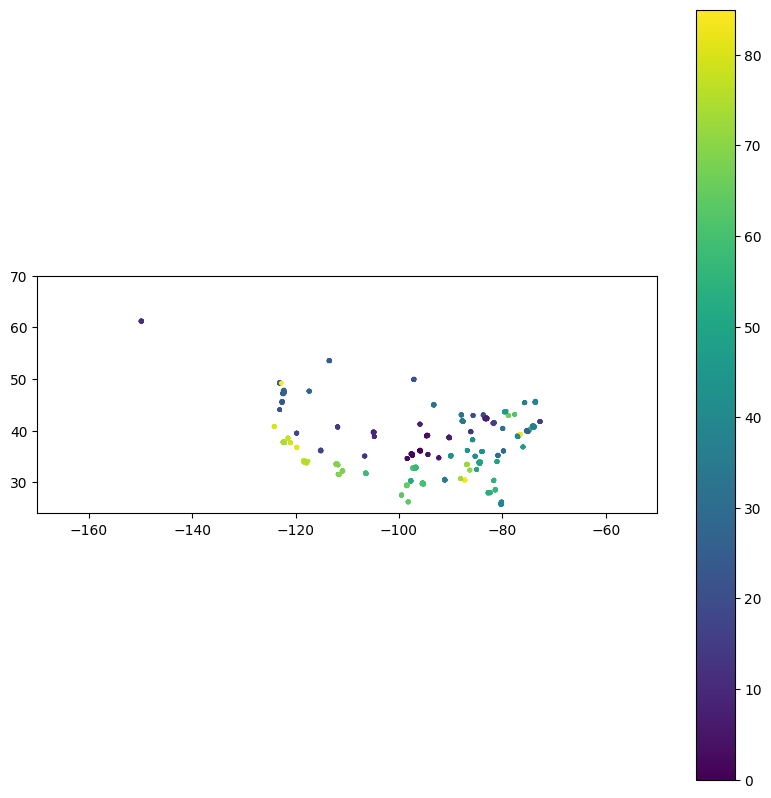

In [19]:
import geopandas as gpd
from shapely.geometry import Point


gdf = gpd.GeoDataFrame(filtered_data, geometry=gpd.points_from_xy(filtered_data.longitude, filtered_data.latitude))

fig, ax = plt.subplots(figsize=(10, 10))  # You can adjust the size to suit your needs
gdf.plot(column='cluster', ax=ax, legend=True, markersize=5, cmap='viridis')

ax.set_xlim(-170, -50)
ax.set_ylim(24, 70)

plt.show()